##IMPORTING LIBRARIES

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter  import PorterStemmer

##LODING DATASET

In [48]:
df = pd.read_csv("/content/spam.csv",encoding="latin")

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


##GIVE CONCISE SUMMARY OF A DATASET

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


##RETURN THE SUM OF ALL THE NULL VALUES

In [50]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

##RENAMING THE COLUMNS

In [51]:
df.rename({"v1":"label","v2":"text"},inplace=True, axis=1)

##BOTTOM 5 ROWS OF THE DATAFRAME

In [52]:
df.tail()

,label,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


##HANDLING CATEGORICAL VALUES

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label']=le.fit_transform(df['label'])

##HANDLING IMBALANCE DATA

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

VECTORIZATION 

In [55]:
tf=TfidfVectorizer()
X=tf.fit_transform(df['text'])
import numpy as np
X=X.toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

DATA SPLITING INTO TRAIN AND VALIDATION SETS

In [56]:
X_train, X_test, y_train, y_test=train_test_split(X, df['label'], test_size=0.2, random_state=0)

In [57]:
#PIP INSTALL IMBLEARN
!pip install imbalanced_learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {}\n".format(sum(y_train==0)))



from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train_res, y_train_res =sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling,the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling,the shape of train_y: {}\n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}\n".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 581
Before OverSampling, counts of label '0': 3876

After OverSampling,the shape of train_X: (7752, 8672)
After OverSampling,the shape of train_y: (7752,)

After OverSampling, counts of label '1': 3876
After OverSampling, counts of label '0': 3876



##CLEANING THE DATASET

In [59]:
#DOWNLOADING STOPWORDS
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [60]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [61]:
import re
corpus=[]
length=len(df)


In [62]:
!pip install re

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


In [64]:
import re

for i in range(0,length):
  
  text=re.sub("[^a-z^A-Z^0-9]", " ",df['text'][i])
  text=text.lower()
  text=text.split()
  pe=PorterStemmer()
  stopword=stopwords.words("english")
  text=[pe.stem(word) for word in text if not word in set(stopword)]
  text=" ".join(text)
  corpus.append(text)

##TEXT PREPROCESSING

In [65]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send 1 50 rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'winner valu network custom select receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash 100 20 000 pound txt csh11 send 87575 cost 150p day 6day 16 tsandc appli repli hl 4 info',
 'urgent 1 week free mem

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(max_features=35000)
X=cv.fit_transform(corpus).toarray()

##SAVING INTO cv.pkl FILE

In [69]:
import pickle
pickle.dump(cv,open('cv1.pkl','wb'))

##EMPLORATORY DATA ANALYSIS

In [70]:
df.describe()

,label
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [71]:
df.shape

(5572, 5)

##VISUAL ANALYSIS

([<matplotlib.axis.XTick at 0x7f3893db1730>,
 [Text(0, 0, 'Non Spam'), Text(1, 0, 'spam')])

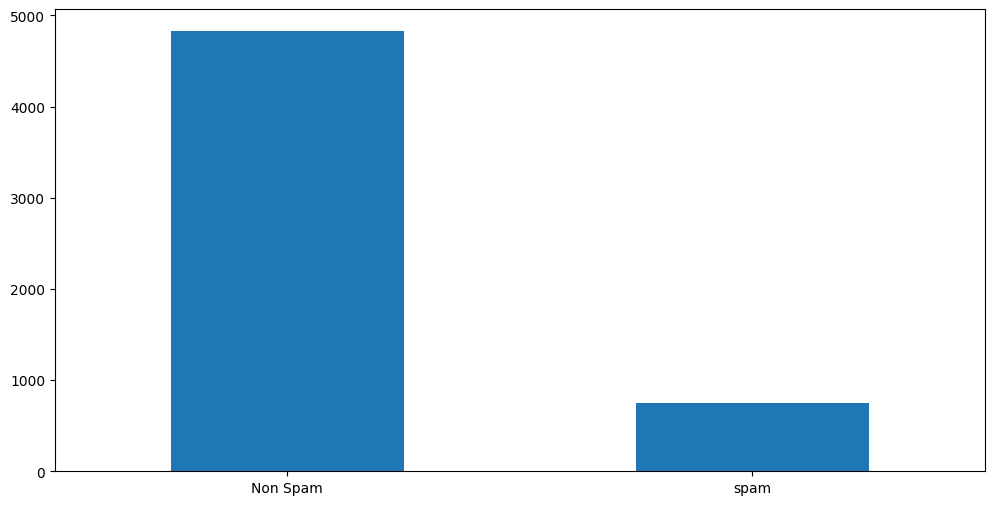

In [73]:
#COUNT PLOT FUNCTION
df["label"].value_counts().plot(kind="bar",figsize=(12,6))
plt.xticks(np.arange(2),('Non Spam','spam'),rotation=0)

##SCALING THE DATA

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale

sc=StandardScaler()
x_bal=sc.fit_transform(X_train)

In [77]:
x_bal=pd.DataFrame(x_bal)

#MODEL BUILDING

##DECISION TREE MODEL

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model=tree.DecisionTreeClassifier()
model.fit(X_train_res,y_train_res)

DecisionTreeClassifier()

##RANDOM FOREST MODEL

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble

model1=ensemble.RandomForestClassifier()
model1.fit(X_train_res,y_train_res)

RandomForestClassifier()

##NAIVE BAYES MODEL

In [91]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import naive_bayes
model=naive_bayes.MultinomialNB()
model.fit(X_train_res,y_train_res)

MultinomialNB()

##ARTIFICIAL NEURAL NETWORK(ANN)

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [107]:
model=Sequential()
X_train.shape

(4457, 8672)

In [170]:
model.add(Dense(units=X_train_res.shape[1],activation="relu",kernel_initializer="random_uniform"))
model.add(Dense(units=100,activation="relu",kernel_initializer="random_uniform"))

model.add(Dense(units=1,activation="sigmoid"))
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
generator=model.fit(X_train_res, y_train_res, epochs=10,steps_per_epoch=len(X_train_res)//64)

Epoch 1/10
121/121 [==============================] - 190s 2s/step - loss: 0.6933 - accuracy: 0.5002
Epoch 2/10
121/121 [==============================] - 189s 2s/step - loss: 0.6932 - accuracy: 0.5020
Epoch 3/10
121/121 [==============================] - 195s 2s/step - loss: 0.6930 - accuracy: 0.5052
Epoch 4/10
121/121 [==============================] - 191s 2s/step - loss: 0.6931 - accuracy: 0.4980
Epoch 5/10
121/121 [==============================] - 191s 2s/step - loss: 0.6934 - accuracy: 0.5021
Epoch 6/10
121/121 [==============================] - 190s 2s/step - loss: 0.6932 - accuracy: 0.4937
Epoch 7/10
121/121 [==============================] - 190s 2s/step - loss: 0.6931 - accuracy: 0.4958
Epoch 8/10
121/121 [==============================] - 191s 2s/step - loss: 0.6931 - accuracy: 0.4970
Epoch 9/10
121/121 [==============================] - 190s 2s/step - loss: 0.6931 - accuracy: 0.4951
Epoch 10/10
111/121 [==========================>...] - ETA: 16s - loss: 0.6931 - accuracy: 

121/121 [==============================] - 181s 1s/step - loss: 0.6931 - accuracy: 0.4985


##TESTING THE MODEL

In [163]:
y_pred=model.predict(X_test)
y_pred=y_pred.flatten()

35/35 [==============================] - 6s 157ms/step


In [111]:
y_pr=np.where(y_pred>0.5,1,0)
y_pr

array([0, 0, 0, ..., 0, 0, 0])

##SAVE THE MODEL INTO TEST THE INPUTS

In [171]:
import re

def new_review(new_review):

  new_review=new_review
  new_review=re.sub('[^a-zA-Z]',' ',str(new_review))

  new_review=new_review.lower()

  new_review.split()

  ps=PorterStemmer()
  all_stopwords=stopwords.words('english')
  all_stopwords.remove('not')
  new_review=[ps.stem(word) for word in new_review if not word in set(all_stopwords)] 

  new_review=' '.join(new_review)
  new_corpus=[new_review]
  new_X_test=cv.transform(new_corpus).toarray()
  print(new_X_test)

  from keras.models import load_model
  new_y_pred=loaded_model.predict(new_X_test)
  print(new_y_pred)
  new_X_pred=np.where(new_y_pred>0.5,1,0)
  return new_y_pred
  new_review=new_review(str(input("Enter new review...")))

#PERFORMANCE TESTING & HYPERPARAMETER TUNING

COMPARE THE MODEL (NAIVE BAYES)

In [156]:
from sklearn.naive_bayes import MultinomialNB
import math
nb=MultinomialNB()
nb.fit(X_train_res,y_train_res)
y_pred=nb.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(y_test,y_pred))
score=(accuracy_score(y_test,y_pred))
print(score)
cm=score*100
print('Accuracy of NAVIE BAYES: ',cm )

[[941   8]
 [ 10 156]]
0.9838565022421525
Accuracy of NAVIE BAYES:  98.38565022421525


COMPARE THE MODEL (DECISION TREE MODEL)

In [157]:
from sklearn.tree import DecisionTreeClassifier
nb1=DecisionTreeClassifier()
nb1.fit(X_train_res,y_train_res)
y_pred=nb1.predict(X_test)

print(confusion_matrix(y_test,y_pred))
SC=(accuracy_score(y_test,y_pred))
print(SC)
c=SC*100
print(c)

[[928  21]
 [ 23 143]]
0.9605381165919282
96.05381165919282


COMPARE THE MODEL(RANDOM FOREST MODEL

In [159]:

from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble

model1=ensemble.RandomForestClassifier()
model1.fit(X_train_res,y_train_res)


y_pred=model1.predict(X_test)

print(confusion_matrix(y_test,y_pred))
sc=(accuracy_score(y_test,y_pred))
print(sc)
m=sc*100
print(m)

[[949   0]
 [ 31 135]]
0.9721973094170404
97.21973094170404


#SAVING OUR MODEL

In [172]:
model.save('spam.h5')
